# Data Science con Pandas

In [2]:
%matplotlib inline 
from __future__ import division # para la division real
import numpy as np
import pandas as pd #algunos gráficos
import matplotlib.pyplot as plt #graficar
import seaborn as sns #graficos más PRO
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

## Load Dataset

In [4]:
with open("DreamBankreports.txt","r",encoding="latin1") as file:  
    data = file.read() 

In [5]:
data[:3000]

"alta:1\t1957\tThe one at the Meads's house, where it's bigger inside than out; there's a European village just inside, with a cobblestone street and a Pied-Piper sort of man with curly hair, he can do things like juggle - I go up the back stairs [there aren't any in the real house] and then down the other side [since there's a second set, immediately] then down a short empty hallway that turns a corner, where I find a tiny room...a young woman with shoulder-length blonde hair in a pageboy is there, cooking at a stove that almost fills the room...she's nice to me. Now outside, I'm waiting for my aunt to pick me up - she arrives in a little round convertible and we go for a drive, not very far - we cross a little bridge over a creek, then double back and she drops me off at the house again. Inside (?) I sit with a couple of people, playing with a string of blue balloons.\nalta:2\t8/11/67\tI'm at a family reunion in a large fine house with grounds (or a maybe a rented public building lik

In [6]:
[doc.split("\t") for doc in data[:3000].split("\n")]

[['alta:1',
  '1957',
  "The one at the Meads's house, where it's bigger inside than out; there's a European village just inside, with a cobblestone street and a Pied-Piper sort of man with curly hair, he can do things like juggle - I go up the back stairs [there aren't any in the real house] and then down the other side [since there's a second set, immediately] then down a short empty hallway that turns a corner, where I find a tiny room...a young woman with shoulder-length blonde hair in a pageboy is there, cooking at a stove that almost fills the room...she's nice to me. Now outside, I'm waiting for my aunt to pick me up - she arrives in a little round convertible and we go for a drive, not very far - we cross a little bridge over a creek, then double back and she drops me off at the house again. Inside (?) I sit with a couple of people, playing with a string of blue balloons."],
 ['alta:2',
  '8/11/67',
  "I'm at a family reunion in a large fine house with grounds (or a maybe a ren

In [7]:
data = pd.read_table("DreamBankreports.txt",encoding="latin1",header=None)
#Puede llegar a ser UT8, hay que ver que se usa.
#latin1 suele ser windows y utf8 para unix.
#el panda interpreta el tab (\t) como columna
data

0         1                                                  2
0         alta:1      1957  The one at the Meads's house, where it's bigge...
1         alta:2   8/11/67  I'm at a family reunion in a large fine house ...
2         alta:3    8/1/85  I watch a plane fly past and shortly realize i...
3         alta:4     1985?  Me pulling the green leaves and berries off so...
4         alta:5     1985?  I'm in a room that reminds me of (but definite...
5         alta:6     1985?  Living next door to Loretta in an apartment - ...
6         alta:7     1985?  Kidnapped - I'm on my way somewhere else (by c...
7         alta:8     1985?  I'm alone in an apartment - old place, inside ...
8         alta:9     1985?  I'm somewhere with a friend I don't want to be...
9        alta:10     1985?  I am in some public place, reminds me of the g...
10       alta:11     1985?  At a school - I don't think I actually go to i...
11       alta:12     1985?  Me and MB (one of my cats) in a big fancy dark...
12       alta:13     1985?  I arrive at a little frame house on a nice lit...
13       alta:14     1985?  I'm in my own apartment by myself and have to ...
14       alta:15   1/11/86  I'm in a car with some people coming from a do...
15       alta:16   1/11/86  I'm in a little store with another woman and m...
16       alta:17   1/12/86  I am with a lot of LT people, at something lik...
17       alta:18   1/14/86  Another old house - Melanie coming over - lip-...
18       alta:19   1/14/86  Or deliver me to house? We sit in car, M. look...
19       alta:20   1/14/86  Eating in a back hallway - Jimmy comes along a...
20       alta:21   1/18/86  I'm on a footbridge with some friends and ther...
21       alta:22   1/19/86  At work (?) was on the elevator with an older ...
22       alta:23   1/20/86  Visiting some rich people - there's a fire in ...
23       alta:24   1/21/86  Bonnie came to see if I needed anything and ju...
24       alta:25   1/22/86  I'm going down a walkway between little, close...
25       alta:26   1/23/86  I'm trying to find the original plans or instr...
26       alta:27   1/26/86  I was walking home with some little glass figu...
27       alta:28   1/26/86  Lynn and Jane and I are at a LT function and t...
28       alta:29   1/26/86  I have come from somewhere else to a house whe...
29       alta:30   1/27/86  Lifegame Roomset - small, high room - sort of ...
...          ...       ...                                                ...
19115   vickie:6  04/17/95  This was a place where you can play with all t...
19116   vickie:7  04/18/95  My sister Valerie (15 years old), my mom and I...
19117   vickie:8  04/20/95  Mom and I were at these rows of phones, and th...
19118   vickie:9  04/20/95  Wendy 8-year-old friend and her brother (10 ye...
19119  vickie:10  04/21/95  I knocked on Sally's door (9-year-old friend)....
19120  vickie:11  04/22/95  I think my dream had my mom and my sister Vale...
19121  vickie:12  04/25/95  We got this new house. It was really, really b...
19122  vickie:13  04/26/95  Valerie, Nancy (19-year-old sister) and I were...
19123  vickie:14  04/28/95  There were these cowboys traveling. They were ...
19124  vickie:15  04/30/95  I am in a tree, and Nancy is standing on the g...
19125  vickie:16  05/02/95  There was this girl from school. She came up t...
19126  vickie:17  05/02/95  Nancy, Mom, and I were looking in a store for ...
19127  vickie:18  05/04/95  It started out, it was Nancy and me. We were g...
19128  vickie:19  05/05/95  I had all this money. Mom and Mom's former boy...
19129  vickie:20  05/08/95  I am an adult, and I am wearing a long white s...
19130  vickie:21  05/09/95  All I saw s a long white corridor. It was scar...
19131  vickie:22  05/11/95  There was a carnival, and there was this girl ...
19132  vickie:23  05/12/95  There was a beautiful white castle with roses ...
19133  vickie:24  05/13/95  The dream had my school in it. Jessica (23-yea...
19134  vickie:25  05/14/95  I had a d

In [8]:
# muestralos primeros 5 registros
data.head(5)

0        1                                                  2
0  alta:1     1957  The one at the Meads's house, where it's bigge...
1  alta:2  8/11/67  I'm at a family reunion in a large fine house ...
2  alta:3   8/1/85  I watch a plane fly past and shortly realize i...
3  alta:4    1985?  Me pulling the green leaves and berries off so...
4  alta:5    1985?  I'm in a room that reminds me of (but definite...

In [9]:
#devuelve  (# filas, # columnas)
data.shape

(19145, 3)

In [10]:
#devuelve tamaño del data frame (filas*columnas)
data.size

57435

In [11]:
# Devuelve las columnas del Dataframe 
data.columns

Int64Index([0, 1, 2], dtype='int64')

In [12]:
# Renombro las columnas
data.columns = ["nombre_id","fecha","sueño"]
data.head(3)

nombre_id    fecha                                              sueño
0    alta:1     1957  The one at the Meads's house, where it's bigge...
1    alta:2  8/11/67  I'm at a family reunion in a large fine house ...
2    alta:3   8/1/85  I watch a plane fly past and shortly realize i...

In [13]:
# Devuelve los indices del Dataframe
data.index

RangeIndex(start=0, stop=19145, step=1)

In [14]:
# Devuelve una columna según su header (devuelve una Serie, es una lista pero con índice)
data["fecha"]

0            1957
1         8/11/67
2          8/1/85
3           1985?
4           1985?
5           1985?
6           1985?
7           1985?
8           1985?
9           1985?
10          1985?
11          1985?
12          1985?
13          1985?
14        1/11/86
15        1/11/86
16        1/12/86
17        1/14/86
18        1/14/86
19        1/14/86
20        1/18/86
21        1/19/86
22        1/20/86
23        1/21/86
24        1/22/86
25        1/23/86
26        1/26/86
27        1/26/86
28        1/26/86
29        1/27/86
           ...   
19115    04/17/95
19116    04/18/95
19117    04/20/95
19118    04/20/95
19119    04/21/95
19120    04/22/95
19121    04/25/95
19122    04/26/95
19123    04/28/95
19124    04/30/95
19125    05/02/95
19126    05/02/95
19127    05/04/95
19128    05/05/95
19129    05/08/95
19130    05/09/95
19131    05/11/95
19132    05/12/95
19133    05/13/95
19134    05/14/95
19135    05/05/95
19136    05/16/95
19137    05/17/95
19138    05/18/95
19139    0

In [ ]:
data.fecha

In [15]:
# Seleccion de varias columnas (devuleve un Dataframe)
data[["sueño","fecha"]]

sueño     fecha
0      The one at the Meads's house, where it's bigge...      1957
1      I'm at a family reunion in a large fine house ...   8/11/67
2      I watch a plane fly past and shortly realize i...    8/1/85
3      Me pulling the green leaves and berries off so...     1985?
4      I'm in a room that reminds me of (but definite...     1985?
5      Living next door to Loretta in an apartment - ...     1985?
6      Kidnapped - I'm on my way somewhere else (by c...     1985?
7      I'm alone in an apartment - old place, inside ...     1985?
8      I'm somewhere with a friend I don't want to be...     1985?
9      I am in some public place, reminds me of the g...     1985?
10     At a school - I don't think I actually go to i...     1985?
11     Me and MB (one of my cats) in a big fancy dark...     1985?
12     I arrive at a little frame house on a nice lit...     1985?
13     I'm in my own apartment by myself and have to ...     1985?
14     I'm in a car with some people coming from a do...   1/11/86
15     I'm in a little store with another woman and m...   1/11/86
16     I am with a lot of LT people, at something lik...   1/12/86
17     Another old house - Melanie coming over - lip-...   1/14/86
18     Or deliver me to house? We sit in car, M. look...   1/14/86
19     Eating in a back hallway - Jimmy comes along a...   1/14/86
20     I'm on a footbridge with some friends and ther...   1/18/86
21     At work (?) was on the elevator with an older ...   1/19/86
22     Visiting some rich people - there's a fire in ...   1/20/86
23     Bonnie came to see if I needed anything and ju...   1/21/86
24     I'm going down a walkway between little, close...   1/22/86
25     I'm trying to find the original plans or instr...   1/23/86
26     I was walking home with some little glass figu...   1/26/86
27     Lynn and Jane and I are at a LT function and t...   1/26/86
28     I have come from somewhere else to a house whe...   1/26/86
29     Lifegame Roomset - small, high room - sort of ...   1/27/86
...                                                  ...       ...
19115  This was a place where you can play with all t...  04/17/95
19116  My sister Valerie (15 years old), my mom and I...  04/18/95
19117  Mom and I were at these rows of phones, and th...  04/20/95
19118  Wendy 8-year-old friend and her brother (10 ye...  04/20/95
19119  I knocked on Sally's door (9-year-old friend)....  04/21/95
19120  I think my dream had my mom and my sister Vale...  04/22/95
19121  We got this new house. It was really, really b...  04/25/95
19122  Valerie, Nancy (19-year-old sister) and I were...  04/26/95
19123  There were these cowboys traveling. They were ...  04/28/95
19124  I am in a tree, and Nancy is standing on the g...  04/30/95
19125  There was this girl from school. She came up t...  05/02/95
19126  Nancy, Mom, and I were looking in a store for ...  05/02/95
19127  It started out, it was Nancy and me. We were g...  05/04/95
19128  I had all this money. Mom and Mom's former boy...  05/05/95
19129  I am an adult, and I am wearing a long white s...  05/08/95
19130  All I saw s a long white corridor. It was scar...  05/09/95
19131  There was a carnival, and there was this girl ...  05/11/95
19132  There was a beautiful white castle with roses ...  05/12/95
19133  The dream had my school in it. Jessica (23-yea...  05/13/95
19134  I had a dream with horses in it and war. There...  05/14/95
19135  I had this horse, and I was going to go downto...  05/05/95
19136  Mom and I were visiting Grandma at this nursin...  05/16/95
19137  I was at this party. There was food. This woma...  05/17/95
19138  I am at the bus stop waiting to go to Bonnie's...  05/18/95
19139  These people, who were pioneers, heard this ne...  05/20/95
19140  Wendy is an actress, and these two men are aft...  05/22/95
19141  I am in a car with Wendy and her mother. I did...  05/24/95
19142  This really happened on TV, but it was in my d...  05/26/95
19143  I was watching TV, VH 1,

In [16]:
# Devuelve una fila por index (devuelve una Serie)
data.loc[10000]

nombre_id                                          kenneth:603
fecha                                               01/17/1997
sueño        <I>Who The Fuck Are You?</I> <br /><br /> I go...
Name: 10000, dtype: object

In [17]:
# Devuelve varias filas por index (devuelve un Dataframe)
data.loc[[1000,9000,7600,15000]]

nombre_id                       fecha  \
1000             b:0318                    02/28/81   
9000   hall_female:0413  Code 053, Age 21, 07/19/48   
7600      emma:1969-039                     7/25/69   
15000       norman:1130                    11/13/66   

                                                   sueño  
1000   I'm sitting at a table, listening to a woman c...  
9000   This dream took place in an apartment which wa...  
7600   Dream of being sucked up in a rush of warm wat...  
15000  I was working with figures. The number 48 was ...

In [18]:
# Devuelve un elemento por index y columna 
data.loc[1000,"sueño"]

'I\'m sitting at a table, listening to a woman cry about how alone she is. This affects an overweight young woman wearing a low lacy sweater with a blue skirt and white blouse. She starts crying. I say, "Ah, she\'s affected too." She gets up and walks all the way around the table to come and kneel next to me to hug me and cry into my lap. I call her Princess. I think, "Maybe she doesn\'t realize that when it\'s my turn, my stomach gets queazy and I have to go to the bathroom."'

In [19]:
# Devuelve elementos por indices (se accede por posición)
#en este caso, accede a las posiciones de 100 a 109 y columnas 0 y 1
data.iloc[100:109,[0,1]]

nombre_id    fecha
100  alta:101  5/31/86
101  alta:102  5/31/86
102  alta:103   6/7/86
103  alta:104   6/7/86
104  alta:105   6/9/86
105  alta:106  6/11/86
106  alta:107  6/15/86
107  alta:108  6/23/86
108  alta:109  6/25/86

In [20]:
data.iloc[100:109,:] #todas las columnas de las filas 100 a 109

nombre_id    fecha                                              sueño
100  alta:101  5/31/86  I'm around a bunch of people working together,...
101  alta:102  5/31/86  I'm in a house - I don't think it's mine - the...
102  alta:103   6/7/86  I'm out someplace pretty far from home and I w...
103  alta:104   6/7/86  I'm on a bus with a couple of guys - one's the...
104  alta:105   6/9/86  I live in a little house a bit like Grandmom's...
105  alta:106  6/11/86  I'm on a bus, going to the dentist, across an ...
106  alta:107  6/15/86  I've just gotten home from school - I live in ...
107  alta:108  6/23/86  I'm looking for a boy - I'm my own age, probab...
108  alta:109  6/25/86  I'm driving a car, going into town on a road,t...

In [21]:
data.iloc[:100,-1] #Las primeras 100 filas, última columna

0     The one at the Meads's house, where it's bigge...
1     I'm at a family reunion in a large fine house ...
2     I watch a plane fly past and shortly realize i...
3     Me pulling the green leaves and berries off so...
4     I'm in a room that reminds me of (but definite...
5     Living next door to Loretta in an apartment - ...
6     Kidnapped - I'm on my way somewhere else (by c...
7     I'm alone in an apartment - old place, inside ...
8     I'm somewhere with a friend I don't want to be...
9     I am in some public place, reminds me of the g...
10    At a school - I don't think I actually go to i...
11    Me and MB (one of my cats) in a big fancy dark...
12    I arrive at a little frame house on a nice lit...
13    I'm in my own apartment by myself and have to ...
14    I'm in a car with some people coming from a do...
15    I'm in a little store with another woman and m...
16    I am with a lot of LT people, at something lik...
17    Another old house - Melanie coming over - 

## Selección a partir de los datos

In [22]:
# serie con elementos booleanos 
# es nan? (devuelve una series de True o False)
Serie_es_nan = data.sueño.isnull()
Serie_es_nan.head()

0    False
1    False
2    False
3    False
4    False
Name: sueño, dtype: bool

In [23]:
# devuelve las filas con True
#Si al dataframe le pongo una serie de booleanos del mismo largo, me filtra los que son true
data[Serie_es_nan]

nombre_id     fecha sueño
6497   dorothea:375  12/--/59   NaN
17744  peru-f:F23-6       NaN   NaN

In [24]:
# el ~ niega la serie (NOT)
~Serie_es_nan.head()

0    True
1    True
2    True
3    True
4    True
Name: sueño, dtype: bool

In [25]:
# filtro las filas con nan 
# El copy para que no le ponga un puntero, haga la copia explícita.
data = data[~Serie_es_nan].copy()

In [26]:
data.shape

(19143, 3)

# Apply 

In [27]:
# Aplica una funcion a cada elemento de la Serie
nombre_splitted = data.nombre_id.apply(lambda x: pd.Series(x.split(":"),index=["nombre","indice"]))

In [37]:
data.nombre_id.str.split(pat=":", expand=True)


AttributeError: 'DataFrame' object has no attribute 'nombre_id'

In [28]:
nombre_splitted

nombre indice
0        alta      1
1        alta      2
2        alta      3
3        alta      4
4        alta      5
5        alta      6
6        alta      7
7        alta      8
8        alta      9
9        alta     10
10       alta     11
11       alta     12
12       alta     13
13       alta     14
14       alta     15
15       alta     16
16       alta     17
17       alta     18
18       alta     19
19       alta     20
20       alta     21
21       alta     22
22       alta     23
23       alta     24
24       alta     25
25       alta     26
26       alta     27
27       alta     28
28       alta     29
29       alta     30
...       ...    ...
19115  vickie      6
19116  vickie      7
19117  vickie      8
19118  vickie      9
19119  vickie     10
19120  vickie     11
19121  vickie     12
19122  vickie     13
19123  vickie     14
19124  vickie     15
19125  vickie     16
19126  vickie     17
19127  vickie     18
19128  vickie     19
19129  vickie     20
19130  vickie     21
19131  vickie     22
19132  vickie     23
19133  vickie     24
19134  vickie     25
19135  vickie     26
19136  vickie     27
19137  vickie     28
19138  vickie     29
19139  vickie     30
19140  vickie     31
19141  vickie     32
19142  vickie     33
19143  vickie     34
19144  vickie     35

[19143 rows x 2 columns]

In [30]:
# pd.concat junta dataframes/series. Ojo que importan los indices, axis dice que concatenes por fila
data = pd.concat( [data,nombre_splitted],axis=1).copy()
data

nombre_id     fecha                                              sueño  \
0         alta:1      1957  The one at the Meads's house, where it's bigge...   
1         alta:2   8/11/67  I'm at a family reunion in a large fine house ...   
2         alta:3    8/1/85  I watch a plane fly past and shortly realize i...   
3         alta:4     1985?  Me pulling the green leaves and berries off so...   
4         alta:5     1985?  I'm in a room that reminds me of (but definite...   
5         alta:6     1985?  Living next door to Loretta in an apartment - ...   
6         alta:7     1985?  Kidnapped - I'm on my way somewhere else (by c...   
7         alta:8     1985?  I'm alone in an apartment - old place, inside ...   
8         alta:9     1985?  I'm somewhere with a friend I don't want to be...   
9        alta:10     1985?  I am in some public place, reminds me of the g...   
10       alta:11     1985?  At a school - I don't think I actually go to i...   
11       alta:12     1985?  Me and MB (one of my cats) in a big fancy dark...   
12       alta:13     1985?  I arrive at a little frame house on a nice lit...   
13       alta:14     1985?  I'm in my own apartment by myself and have to ...   
14       alta:15   1/11/86  I'm in a car with some people coming from a do...   
15       alta:16   1/11/86  I'm in a little store with another woman and m...   
16       alta:17   1/12/86  I am with a lot of LT people, at something lik...   
17       alta:18   1/14/86  Another old house - Melanie coming over - lip-...   
18       alta:19   1/14/86  Or deliver me to house? We sit in car, M. look...   
19       alta:20   1/14/86  Eating in a back hallway - Jimmy comes along a...   
20       alta:21   1/18/86  I'm on a footbridge with some friends and ther...   
21       alta:22   1/19/86  At work (?) was on the elevator with an older ...   
22       alta:23   1/20/86  Visiting some rich people - there's a fire in ...   
23       alta:24   1/21/86  Bonnie came to see if I needed anything and ju...   
24       alta:25   1/22/86  I'm going down a walkway between little, close...   
25       alta:26   1/23/86  I'm trying to find the original plans or instr...   
26       alta:27   1/26/86  I was walking home with some little glass figu...   
27       alta:28   1/26/86  Lynn and Jane and I are at a LT function and t...   
28       alta:29   1/26/86  I have come from somewhere else to a house whe...   
29       alta:30   1/27/86  Lifegame Roomset - small, high room - sort of ...   
...          ...       ...                                                ...   
19115   vickie:6  04/17/95  This was a place where you can play with all t...   
19116   vickie:7  04/18/95  My sister Valerie (15 years old), my mom and I...   
19117   vickie:8  04/20/95  Mom and I were at these rows of phones, and th...   
19118   vickie:9  04/20/95  Wendy 8-year-old friend and her brother (10 ye...   
19119  vickie:10  04/21/95  I knocked on Sally's door (9-year-old friend)....   
19120  vickie:11  04/22/95  I think my dream had my mom and my sister Vale...   
19121  vickie:12  04/25/95  We got this new house. It was really, really b...   
19122  vickie:13  04/26/95  Valerie, Nancy (19-year-old sister) and I were...   
19123  vickie:14  04/28/95  There were these cowboys traveling. They were ...   
19124  vickie:15  04/30/95  I am in a tree, and Nancy is standing on the g...   
19125  vickie:16  05/02/95  There was this girl from school. She came up t...   
19126  vickie:17  05/02/95  Nancy, Mom, and I were looking in a store for ...   
19127  vickie:18  05/04/95  It started out, it was Nancy and me. We were g...   
19128  vickie:19  05/05/95  I had all this money. Mom and Mom's former boy...   
19129  vickie:20  05/08/95  I am an adult, and I am wearing a long white s...   
19130  vickie:21  05/09/95  All I saw s a long white corridor. It was scar...   
19131  vickie:22  05/11/95  There was a carnival, and there was this girl ...   
19132  vickie:23  05/12/95  There was 

In [31]:
# tiro la columna "nombre_id"
data.drop("nombre_id",axis=1,inplace=True)

In [32]:
data

fecha                                              sueño  nombre  \
0          1957  The one at the Meads's house, where it's bigge...    alta   
1       8/11/67  I'm at a family reunion in a large fine house ...    alta   
2        8/1/85  I watch a plane fly past and shortly realize i...    alta   
3         1985?  Me pulling the green leaves and berries off so...    alta   
4         1985?  I'm in a room that reminds me of (but definite...    alta   
5         1985?  Living next door to Loretta in an apartment - ...    alta   
6         1985?  Kidnapped - I'm on my way somewhere else (by c...    alta   
7         1985?  I'm alone in an apartment - old place, inside ...    alta   
8         1985?  I'm somewhere with a friend I don't want to be...    alta   
9         1985?  I am in some public place, reminds me of the g...    alta   
10        1985?  At a school - I don't think I actually go to i...    alta   
11        1985?  Me and MB (one of my cats) in a big fancy dark...    alta   
12        1985?  I arrive at a little frame house on a nice lit...    alta   
13        1985?  I'm in my own apartment by myself and have to ...    alta   
14      1/11/86  I'm in a car with some people coming from a do...    alta   
15      1/11/86  I'm in a little store with another woman and m...    alta   
16      1/12/86  I am with a lot of LT people, at something lik...    alta   
17      1/14/86  Another old house - Melanie coming over - lip-...    alta   
18      1/14/86  Or deliver me to house? We sit in car, M. look...    alta   
19      1/14/86  Eating in a back hallway - Jimmy comes along a...    alta   
20      1/18/86  I'm on a footbridge with some friends and ther...    alta   
21      1/19/86  At work (?) was on the elevator with an older ...    alta   
22      1/20/86  Visiting some rich people - there's a fire in ...    alta   
23      1/21/86  Bonnie came to see if I needed anything and ju...    alta   
24      1/22/86  I'm going down a walkway between little, close...    alta   
25      1/23/86  I'm trying to find the original plans or instr...    alta   
26      1/26/86  I was walking home with some little glass figu...    alta   
27      1/26/86  Lynn and Jane and I are at a LT function and t...    alta   
28      1/26/86  I have come from somewhere else to a house whe...    alta   
29      1/27/86  Lifegame Roomset - small, high room - sort of ...    alta   
...         ...                                                ...     ...   
19115  04/17/95  This was a place where you can play with all t...  vickie   
19116  04/18/95  My sister Valerie (15 years old), my mom and I...  vickie   
19117  04/20/95  Mom and I were at these rows of phones, and th...  vickie   
19118  04/20/95  Wendy 8-year-old friend and her brother (10 ye...  vickie   
19119  04/21/95  I knocked on Sally's door (9-year-old friend)....  vickie   
19120  04/22/95  I think my dream had my mom and my sister Vale...  vickie   
19121  04/25/95  We got this new house. It was really, really b...  vickie   
19122  04/26/95  Valerie, Nancy (19-year-old sister) and I were...  vickie   
19123  04/28/95  There were these cowboys traveling. They were ...  vickie   
19124  04/30/95  I am in a tree, and Nancy is standing on the g...  vickie   
19125  05/02/95  There was this girl from school. She came up t...  vickie   
19126  05/02/95  Nancy, Mom, and I were looking in a store for ...  vickie   
19127  05/04/95  It started out, it was Nancy and me. We were g...  vickie   
19128  05/05/95  I had all this money. Mom and Mom's former boy...  vickie   
19129  05/08/95  I am an adult, and I am wearing a long white s...  vickie   
19130  05/09/95  All I saw s a long white corridor. It was scar...  vickie   
19131  05/11/95  There was a carnival, and there was this girl ...  vickie   
19132  05/12/95  There was a beautiful white castle with roses ...  vickie   
19133  05/13/95  The dream had my school in it. Jessica (23-yea...  vickie   
19134  05/14/95  I had a dream w

In [33]:
# tomo el subset de ringo
data[data.nombre=="ringo"]

fecha                                              sueño nombre  \
18538  10/07/64  My little brother chased me out of the house o...  ringo   
18539  10/12/64  I'm working in a hospital, in what field I don...  ringo   
18540  10/13/64  Myself and a friend were shooting guns at tin ...  ringo   
18541  10/15/64  I fell in love with a girl I know by the name ...  ringo   
18542  10/18/64  I'm asleep. I wake up and go behind our house ...  ringo   
18543  10/19/64  My band is playing for a private party in the ...  ringo   
18544  10/21/64  My brother Tony and I have a large truck, a re...  ringo   
18545  10/22/64  U.S.S.R. is taking over U.S.A. My house is the...  ringo   
18546  10/22/64  I'm out in a boat with a friend. I don't know ...  ringo   
18547  10/24/64  My little brother Willie, my father and myself...  ringo   
18548  10/26/64  I'm following somebody down the street. In my ...  ringo   
18549  10/27/64  I was attending a meeting of some sort. The me...  ringo   
18550  10/29/64  Congratulations, I got married last night! But...  ringo   
18551  10/31/64  I'm babysitting on Halloween night. Five beaut...  ringo   
18552  11/02/64  I'm drinking beer at a bar where the police co...  ringo   
18553  11/02/64  I start to practice on my drum set and stop af...  ringo   

      indice  
18538      1  
18539      2  
18540      3  
18541      4  
18542      5  
18543      6  
18544      7  
18545      8  
18546      9  
18547     10  
18548     11  
18549     12  
18550     13  
18551     14  
18552     15  
18553     16

In [34]:
# El método "value_counts()" devuelve las frecuencias de apariciones
data.nombre.value_counts()

b                      3116
kenneth                2022
norman                 1235
emma                   1221
b2                     1138
pegasus                1093
dorothea                899
hall_female             681
norms-m                 491
norms-f                 490
alta                    422
peru-m                  384
peru-f                  381
madeline3-offcampus     348
merri                   315
madeline4-postgrad      294
miami-lab               274
blind-f                 238
natural_scientist       234
bay_area_girls_456      234
phil2                   220
arlie                   212
melora                  209
madeline2-dorms         186
phil3                   180
miami-home              171
david                   166
bay_area_girls_789      154
blind-m                 143
ed                      143
melvin                  128
midwest_teens-f         111
esther                  110
phil1                   106
chris                   100
madeline1-hs        

In [35]:
# agrego una nueva columna con el largo de los tokens de cada sueño
data["largo"] = data.sueño.apply(lambda x: len(word_tokenize(x)))
data

fecha                                              sueño  nombre  \
0          1957  The one at the Meads's house, where it's bigge...    alta   
1       8/11/67  I'm at a family reunion in a large fine house ...    alta   
2        8/1/85  I watch a plane fly past and shortly realize i...    alta   
3         1985?  Me pulling the green leaves and berries off so...    alta   
4         1985?  I'm in a room that reminds me of (but definite...    alta   
5         1985?  Living next door to Loretta in an apartment - ...    alta   
6         1985?  Kidnapped - I'm on my way somewhere else (by c...    alta   
7         1985?  I'm alone in an apartment - old place, inside ...    alta   
8         1985?  I'm somewhere with a friend I don't want to be...    alta   
9         1985?  I am in some public place, reminds me of the g...    alta   
10        1985?  At a school - I don't think I actually go to i...    alta   
11        1985?  Me and MB (one of my cats) in a big fancy dark...    alta   
12        1985?  I arrive at a little frame house on a nice lit...    alta   
13        1985?  I'm in my own apartment by myself and have to ...    alta   
14      1/11/86  I'm in a car with some people coming from a do...    alta   
15      1/11/86  I'm in a little store with another woman and m...    alta   
16      1/12/86  I am with a lot of LT people, at something lik...    alta   
17      1/14/86  Another old house - Melanie coming over - lip-...    alta   
18      1/14/86  Or deliver me to house? We sit in car, M. look...    alta   
19      1/14/86  Eating in a back hallway - Jimmy comes along a...    alta   
20      1/18/86  I'm on a footbridge with some friends and ther...    alta   
21      1/19/86  At work (?) was on the elevator with an older ...    alta   
22      1/20/86  Visiting some rich people - there's a fire in ...    alta   
23      1/21/86  Bonnie came to see if I needed anything and ju...    alta   
24      1/22/86  I'm going down a walkway between little, close...    alta   
25      1/23/86  I'm trying to find the original plans or instr...    alta   
26      1/26/86  I was walking home with some little glass figu...    alta   
27      1/26/86  Lynn and Jane and I are at a LT function and t...    alta   
28      1/26/86  I have come from somewhere else to a house whe...    alta   
29      1/27/86  Lifegame Roomset - small, high room - sort of ...    alta   
...         ...                                                ...     ...   
19115  04/17/95  This was a place where you can play with all t...  vickie   
19116  04/18/95  My sister Valerie (15 years old), my mom and I...  vickie   
19117  04/20/95  Mom and I were at these rows of phones, and th...  vickie   
19118  04/20/95  Wendy 8-year-old friend and her brother (10 ye...  vickie   
19119  04/21/95  I knocked on Sally's door (9-year-old friend)....  vickie   
19120  04/22/95  I think my dream had my mom and my sister Vale...  vickie   
19121  04/25/95  We got this new house. It was really, really b...  vickie   
19122  04/26/95  Valerie, Nancy (19-year-old sister) and I were...  vickie   
19123  04/28/95  There were these cowboys traveling. They were ...  vickie   
19124  04/30/95  I am in a tree, and Nancy is standing on the g...  vickie   
19125  05/02/95  There was this girl from school. She came up t...  vickie   
19126  05/02/95  Nancy, Mom, and I were looking in a store for ...  vickie   
19127  05/04/95  It started out, it was Nancy and me. We were g...  vickie   
19128  05/05/95  I had all this money. Mom and Mom's former boy...  vickie   
19129  05/08/95  I am an adult, and I am wearing a long white s...  vickie   
19130  05/09/95  All I saw s a long white corridor. It was scar...  vickie   
19131  05/11/95  There was a carnival, and there was this girl ...  vickie   
19132  05/12/95  There was a beautiful white castle with roses ...  vickie   
19133  05/13/95  The dream had my school in it. Jessica (23-yea...  vickie   
19134  05/14/95  I had a dream w

In [38]:
def numero_de_palabras_distintas(x):
    return len(set(word_tokenize(x)))
numero_de_palabras_distintas("cuando digo digo no digo digo")

3

In [39]:
data["N_distintas"] = data.sueño.apply(numero_de_palabras_distintas)
data

fecha                                              sueño  nombre  \
0          1957  The one at the Meads's house, where it's bigge...    alta   
1       8/11/67  I'm at a family reunion in a large fine house ...    alta   
2        8/1/85  I watch a plane fly past and shortly realize i...    alta   
3         1985?  Me pulling the green leaves and berries off so...    alta   
4         1985?  I'm in a room that reminds me of (but definite...    alta   
5         1985?  Living next door to Loretta in an apartment - ...    alta   
6         1985?  Kidnapped - I'm on my way somewhere else (by c...    alta   
7         1985?  I'm alone in an apartment - old place, inside ...    alta   
8         1985?  I'm somewhere with a friend I don't want to be...    alta   
9         1985?  I am in some public place, reminds me of the g...    alta   
10        1985?  At a school - I don't think I actually go to i...    alta   
11        1985?  Me and MB (one of my cats) in a big fancy dark...    alta   
12        1985?  I arrive at a little frame house on a nice lit...    alta   
13        1985?  I'm in my own apartment by myself and have to ...    alta   
14      1/11/86  I'm in a car with some people coming from a do...    alta   
15      1/11/86  I'm in a little store with another woman and m...    alta   
16      1/12/86  I am with a lot of LT people, at something lik...    alta   
17      1/14/86  Another old house - Melanie coming over - lip-...    alta   
18      1/14/86  Or deliver me to house? We sit in car, M. look...    alta   
19      1/14/86  Eating in a back hallway - Jimmy comes along a...    alta   
20      1/18/86  I'm on a footbridge with some friends and ther...    alta   
21      1/19/86  At work (?) was on the elevator with an older ...    alta   
22      1/20/86  Visiting some rich people - there's a fire in ...    alta   
23      1/21/86  Bonnie came to see if I needed anything and ju...    alta   
24      1/22/86  I'm going down a walkway between little, close...    alta   
25      1/23/86  I'm trying to find the original plans or instr...    alta   
26      1/26/86  I was walking home with some little glass figu...    alta   
27      1/26/86  Lynn and Jane and I are at a LT function and t...    alta   
28      1/26/86  I have come from somewhere else to a house whe...    alta   
29      1/27/86  Lifegame Roomset - small, high room - sort of ...    alta   
...         ...                                                ...     ...   
19115  04/17/95  This was a place where you can play with all t...  vickie   
19116  04/18/95  My sister Valerie (15 years old), my mom and I...  vickie   
19117  04/20/95  Mom and I were at these rows of phones, and th...  vickie   
19118  04/20/95  Wendy 8-year-old friend and her brother (10 ye...  vickie   
19119  04/21/95  I knocked on Sally's door (9-year-old friend)....  vickie   
19120  04/22/95  I think my dream had my mom and my sister Vale...  vickie   
19121  04/25/95  We got this new house. It was really, really b...  vickie   
19122  04/26/95  Valerie, Nancy (19-year-old sister) and I were...  vickie   
19123  04/28/95  There were these cowboys traveling. They were ...  vickie   
19124  04/30/95  I am in a tree, and Nancy is standing on the g...  vickie   
19125  05/02/95  There was this girl from school. She came up t...  vickie   
19126  05/02/95  Nancy, Mom, and I were looking in a store for ...  vickie   
19127  05/04/95  It started out, it was Nancy and me. We were g...  vickie   
19128  05/05/95  I had all this money. Mom and Mom's former boy...  vickie   
19129  05/08/95  I am an adult, and I am wearing a long white s...  vickie   
19130  05/09/95  All I saw s a long white corridor. It was scar...  vickie   
19131  05/11/95  There was a carnival, and there was this girl ...  vickie   
19132  05/12/95  There was a beautiful white castle with roses ...  vickie   
19133  05/13/95  The dream had my school in it. Jessica (23-yea...  vickie   
19134  05/14/95  I had a dream w

## Groupby

In [40]:
# Calcula la mediana de los indices por provincia
#N_distintas sería el tamaño del vocabulario, porque es la cantidad de palabras diferentes que tiene el corpus.
data_promedio = data.groupby(by="nombre")["largo","N_distintas"].mean()
data_promedio

largo  N_distintas
nombre                                      
alta                 490.765403   202.924171
angie                224.770833   107.333333
arlie                115.683962    69.547170
b                    220.222721   110.668164
b2                   224.421793   115.825132
bay_area_girls_456   164.628205    84.538462
bay_area_girls_789   188.967532    97.370130
blind-f              169.533613    85.705882
blind-m              147.727273    75.671329
bosnak               173.962264    90.603774
chris                161.960000    94.110000
chuck                194.866667   108.400000
dahlia               116.708333    65.916667
david                255.650602   128.108434
dorothea              88.121246    58.229143
ed                   198.104895   101.909091
edna                 274.368421   118.368421
emma                  88.058968    59.799345
emmas_husband        192.194444   111.750000
esther                99.327273    59.518182
hall_female          306.447871   137.660793
jeff                 322.390805   151.459770
joan                 192.833333    96.642857
kenneth              222.647873   111.708704
mack                 216.157895   104.631579
madeline1-hs         148.938776    83.948980
madeline2-dorms      147.580645    83.376344
madeline3-offcampus  113.298851    67.267241
madeline4-postgrad   187.901361    98.448980
mark                  47.347826    29.521739
melissa              126.606742    64.910112
melora               476.846890   179.746411
melvin               593.007812   223.710938
merri                390.006349   184.885714
miami-home           276.280702   121.608187
miami-lab            399.835766   159.354015
midwest_teens-f      104.135135    62.765766
midwest_teens-m       68.156627    44.048193
nancy                151.022727    80.454545
natural_scientist    169.632479    99.970085
norman                47.106883    32.319028
norms-f              145.518367    84.259184
norms-m              131.668024    78.433809
pegasus              140.354986    75.263495
peru-f               161.900262    84.433071
peru-m               127.341146    71.401042
phil1                173.556604    96.915094
phil2                214.359091   112.390909
phil3                175.888889    94.444444
physiologist         119.523256    78.860465
ringo                145.250000    81.375000
samantha             399.111111   186.809524
seventh_graders      165.840580    86.550725
toby                 284.393939   139.545455
tom                  190.407407   100.814815
ucsc_women           153.382716    86.024691
vickie               125.800000    68.257143
west_coast_teens     126.269663    71.483146

# Plots

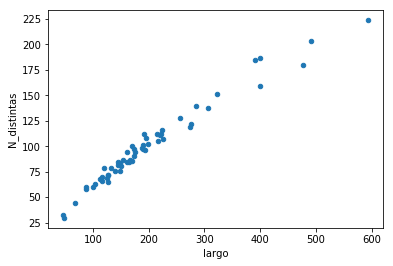

In [41]:
data_promedio.plot.scatter(x="largo",y="N_distintas") #Diversidad léxica
#Uno no esperaría que sea lineal, ya que con pocas palabras lo más normal es tener diferentes, pero a mayor cantidad
#de palabras se comienzan a repetir.

In [42]:
#me separa al dataset en los sueños de dos autores y luego armo un nuevo dataframe con estos dos autores.
data_teens = data[(data.nombre=="bay_area_girls_456")|(data.nombre=="bay_area_girls_789")]
data_teens

fecha                                              sueño  \
4936  4th grader, 01/18/97  I was looking at the moon and another thing th...   
4937  4th grader, 01/18/97  This dream was about an alien who was playing ...   
4938  4th grader, 01/26/97  I was on a farm with some other people. Me and...   
4939  4th grader, 01/31/97  I was at school at the summer camp California ...   
4940  4th grader, 02/01/97  It was Bring Your Pet Day at the Science Faire...   
4941  4th grader, 02/01/97  I was in a pool with my friend Anna, and we we...   
4942  4th grader, 02/05/97  First, I was singing in the My school Choir. T...   
4943  4th grader, 01/17/97  I was going west to Oregon in a wagon train, a...   
4944  4th grader, 01/18/97  School was in session and my friends Barb and ...   
4945  4th grader, 01/21/97  I was outside kicking around my soccer ball an...   
4946  4th grader, 01/24/97  My Dad and I were throwing a surprise birthday...   
4947  4th grader, 01/25/97  It was 9:00 in the evening, and my kitten was ...   
4948  4th grader, 01/27/97  It was an open house at some school (some real...   
4949  4th grader, 01/17/97  A new girl was hired to cut our hedges (she's ...   
4950  4th grader, 01/23/97  Our whole class was going on a camping trip. M...   
4951  4th grader, 01/27/97  My friend's sister wanted to go to boarding sc...   
4952  4th grader, 01/31/97  We were in Maui. Maui had a bear problem. We w...   
4953  4th grader, 01/30/97  My dad had a friend. She looked like Cruella D...   
4954  4th grader, 01/17/97  I was in San Francisco. There was a steep roll...   
4955  4th grader, 01/18/97  I was at school, and we were getting told what...   
4956  4th grader, 01/26/97  I was a snake in a stream, and a boat came and...   
4957  4th grader, 01/29/97  In my dream I thought that dreams were all con...   
4958   4th grader, undated  I was in the mountains (Tahoe - with my mother...   
4959  4th grader, 01/31/97  I was sitting by a river (in London), and a ma...   
4960  4th grader, 01/20/97  Criminals were chasing me and my friend Lori. ...   
4961  4th grader, 01/21/97  I was in aftercare at school, and all of a sud...   
4962  4th grader, 01/22/97  George and Elaine were in my science project. ...   
4963  4th grader, 01/23/97  My dog was leaping toward me and my mom was ma...   
4964  4th grader, 01/24/97  At My school, there was this big humongous cas...   
4965  4th grader, 01/24/97  I had to read in a book. The book (in real lif...   
...                    ...                                                ...   
5294  9th grader, 01/27/97  I was on a cruise and it was summer. A waiter,...   
5295  9th grader, 01/28/97  I was Dorothy from the Wizard of Oz, and the W...   
5296  9th grader, 01/29/97  I was having a birthday party and my friends s...   
5297  9th grader, 01/30/97  I was sleeping over at my friend's house, and ...   
5298  9th grader, 01/31/97  I was a Carebear from the show "Carebears" and...   
5299  9th grader, 01/31/97  I had a younger sister who ran away. I had to ...   
5300  9th grader, 01/26/97  My cousin's friend was over who I'd never met ...   
5301  9th grader, 01/28/97  I was trying to see if I could make a compost ...   
5302  9th grader, 01/30/97  All I remember is the end of the dream: I was ...   
5303  9th grader, 01/31/97  I was doing a play, and we did lots of improv ...   
5304  9th grader, 01/21/97  Me and my brother Max were swimming in the oce...   
5305  9th grader, 01/23/97  I went to summer camp, met a girl who liked my...   
5306  9th grader, 01/24/97  All I an remember is going through a house the...   
5307  9th grader, 01/26/97  The first part of the dream I was with a bunch...   
5308  9th grader, 01/25/97  I was at a dance at my school, but I didn't re...   
5309  9th grader, 01/26/97  I was in this weird building, with a few frien...   
5310  9th grader, 01/28/97  I went to a toystore with my dad and my friend...   
5311  9th grader, 01/29/97  I was walking in a fores

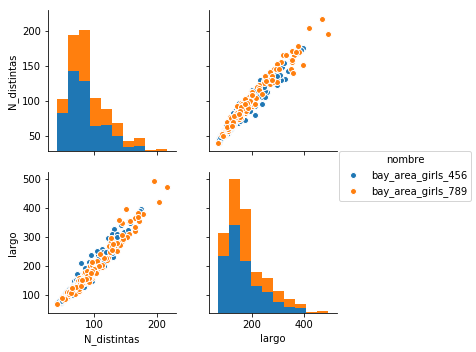

In [45]:
sns.pairplot(data_teens[["N_distintas","largo","nombre"]], hue="nombre")

In [46]:
lexical_complexity = data_teens.N_distintas/data_teens.largo
data_teens["lexical_complexity"] = lexical_complexity.copy()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5,0.98,'')

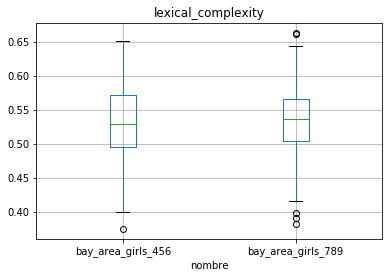

In [47]:
data_teens.boxplot(column="lexical_complexity", by="nombre")
plt.suptitle('')

# Ejercicio 6
### 1) armar un DataFrame "df_barbara" con las siguientes columnas: ["nombre","indice","fecha","sueño"] que contenga los sueños de "b" y "b2"
### 2) Hallar la frecuencia de aparicion de las distintas palabras. Que es mayor? (a) el número de palabras que aparecieron 1 sola vez (hapaxes) o (b) el número de veces que aparece la palabra más frecuente?
### 3) Agregar la columna "edad" al dataframe "df_barbara" con la edad de Barbara, sabiendo que nacio en 1942 y plotear cuantos sueños tiene por edad y el numero de palabras promedio escritas por edad
### 4) Armar un dataset que contenga los sueños de Barbara taggeados segun 2 grupos etarios 0-40 (edad<=40 B) y 50-adelante (edad>=50).   

# Ejemplo de respuesta ej 6

### 1) armar un DataFrame "df_barbara" con las siguientes columnas: ["nombre","indice","fecha","sueño"] que contenga los sueños de "b" y "b2"

In [ ]:
data = pd.read_table("DreamBankreports.txt",encoding="latin1",header=None)
nombre_splitted = data[0].apply(lambda x: pd.Series(x.split(":"),index=["nombre","index"]))
data = pd.concat( [data,nombre_splitted],axis=1)
data.drop(0,axis=1,inplace=True)# tiro la columna 0
data.columns = ["fecha","sueño","nombre","indice"]

In [ ]:
df_barbara = data[(data.nombre=="b")|(data.nombre=="b2")].copy()

In [ ]:
df_barbara

### 2) Hallar la frecuencia de aparicion de las distintas palabras. Que es mayor? (a) el número de palabras que aparecieron 1 sola vez (hapaxes) o (b) el número de veces que aparece la palabra más frecuente?


In [ ]:
words_freq = pd.Series([ w for w in word_tokenize(" ".join(df_barbara.sueño)) if w.isalpha() ] ).value_counts()
words_freq[:10]

In [ ]:
print("porcentaje de apaxes:\t\t\t",sum(words_freq==1)/words_freq.sum()*100)
print("frecuencia de la palabra mas frecuente:\t",words_freq[0]/words_freq.sum()*100)


### 3 ) Agregar la columna "edad" al dataframe "df_barbara" con la edad de Barbara, sabiendo que nacio en 1942 y plotear cuantos sueños tiene por edad y el numero de palabras promedio escritas por edad

In [ ]:
def de_fecha_a_edad(fecha):
    edad = int(fecha.split("/")[-1])-45
    if edad<0:
        edad+=100
    return edad

In [ ]:
df_barbara["edad"] = df_barbara.fecha.apply(de_fecha_a_edad)

In [ ]:
df_barbara.edad.hist(bins=30)
plt.xlabel("edad"); plt.ylabel("Número de sueños")

In [ ]:
N = df_barbara.sueño.apply(lambda x: len([w for w in word_tokenize(x) if w.isalpha()]))
N

In [ ]:
df_barbara["N"] = N

In [ ]:
df_barbara[["edad","N"]].groupby("edad").mean().plot()
plt.ylabel("Numero de palabras promedio")

### 4) Armar un dataset que contenga los sueños de Barbara taggeados segun 2 grupos etarios 0-40 (edad<=40 B) y 50-adelante (edad>=50).  

In [ ]:
def set_tag(edad):
    if edad<=40:
        return "0-40"
    elif edad>=50:
        return "50-adelante"
    else:
        return np.nan

In [ ]:
df_barbara["tag"]=df_barbara.edad.apply(set_tag)

In [ ]:
df_barbara.tag.value_counts()

In [ ]:
df_barbara = df_barbara[['sueño','tag']].dropna().copy()

In [ ]:
df_barbara.to_pickle("barbara_dreams.pkl")